# Data Manipulating

DataFrame manipulation in Pandas involves editing and modifying existing DataFrames. 
* Data manipulation can include operations such as filtering, sorting, grouping, joining, and etc.

In [1]:
# Don't forget to always run first libraries that we want to use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Please note that before carrying out data manipulation, we must first ensure that the dataset that will be used is a clean dataset.**

For example, we want to use **"Customer Segmentation Classification"** dataset.

## Load the dataset:

In [2]:
df = pd.read_csv('Train_clean1.csv')

In [3]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A


## Check Percentage Missing Values

In [4]:
missing_values = df.isnull().sum()

missing_percentages = (missing_values / len(df)) * 100

missing_info = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values.values,
    'Missing Percentage': missing_percentages.values
})

print(missing_info)

             Column  Missing Values  Missing Percentage
0                ID               0                 0.0
1            Gender               0                 0.0
2      Ever_Married               0                 0.0
3               Age               0                 0.0
4         Graduated               0                 0.0
5        Profession               0                 0.0
6   Work_Experience               0                 0.0
7    Spending_Score               0                 0.0
8       Family_Size               0                 0.0
9             Var_1               0                 0.0
10     Segmentation               0                 0.0


## Check Data Condition

In [5]:
df.shape

(8068, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     8068 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        8068 non-null   object 
 5   Profession       8068 non-null   object 
 6   Work_Experience  8068 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      8068 non-null   object 
 9   Var_1            8068 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 693.5+ KB


After we ensure that the dataset is **clean**, we can carry out data manipulation:

## A) Organize Data:

### 1. Add a New Column

- We're going to manipulate the data by adding a new column, namely the "Status" column.

That's done not to alter the data values, but to facilitate the machine in reading the data.

In [7]:
# Convert 'Family_Size' column to a numerical data type
df['Family_Size'] = pd.to_numeric(df['Family_Size'], errors='coerce')

# Update the 'Status' column based on the condition
df['Status'] = 'not having a family'
df.loc[df['Family_Size'] >= 2.0, 'Status'] = 'having a family'

In [8]:
# The result:

df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Status
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,having a family
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A,having a family
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,not having a family
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,having a family
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A,having a family


That code snippet classifies individuals based on their family size. If their family size is 2 or more, they are labeled as 'having a family', otherwise, they are labeled as 'not having a family'.

### 2. Filtering

Subset the dataframe rows or columns according to the specified index labels.

- We'd like to retrieve data of customers aged over 40 based on their gender.

In [9]:
df.Gender[df['Age'] > 40].value_counts()

Gender
Male      2279
Female    1745
Name: count, dtype: int64

### 3. Sorting

The sort_values() function is the process of arranging data elements in a specific order, either ascending or descending, based on certain values or criteria.

In [10]:
df.sort_values('Age', ascending=False)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Status
6604,461198,Female,No,89,Yes,Lawyer,1.0,Low,1.0,Cat_6,D,not having a family
4179,466194,Male,Yes,89,No,Lawyer,0.0,Low,1.0,Cat_6,A,not having a family
3669,464245,Female,Yes,89,Yes,Lawyer,2.0,Low,1.0,Cat_6,A,not having a family
1610,463536,Male,Yes,89,Yes,Executive,1.0,High,2.0,Cat_6,C,having a family
5485,462670,Male,Yes,89,Yes,Doctor,1.0,Low,1.0,Cat_6,A,not having a family
...,...,...,...,...,...,...,...,...,...,...,...,...
7614,461308,Male,No,18,No,Healthcare,0.0,Low,2.0,Cat_6,D,having a family
2687,466555,Male,No,18,No,Healthcare,1.0,Low,3.0,Cat_6,D,having a family
6174,459275,Female,No,18,No,Doctor,2.0,Low,4.0,Cat_6,D,having a family
2722,467570,Male,No,18,No,Healthcare,14.0,Low,NaN,Cat_6,D,not having a family


### 4. Slicing or Get Dummies

* Convert categorical variable into dummy/indicator variables.

* Each variable is converted in as many 0/1 variables as there are different values. Columns in the output are each named after a value; if the input is a DataFrame, the name of the original variable is prepended to the value.

In [11]:
df_slice = df[['Spending_Score','Age']]
df_slice

,Spending_Score,Age
0,Low,22
1,Average,38
2,Low,67
3,High,67
4,High,40
...,...,...
8063,Low,22
8064,Low,35
8065,Low,33
8066,Low,27


In [12]:
pd.get_dummies(df_slice, 'Age', dtype=int)

,Age,Age_Average,Age_High,Age_Low
0,22,0,0,1
1,38,1,0,0
2,67,0,0,1
3,67,0,1,0
4,40,0,1,0
...,...,...,...,...
8063,22,0,0,1
8064,35,0,0,1
8065,33,0,0,1
8066,27,0,0,1


### 5. Rename

The rename() function in pandas is used to rename columns or indexes in a DataFrame, allowing users to easily customize the names according to data analysis or presentation needs.

In [13]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Status
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,having a family
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A,having a family
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,not having a family
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,having a family
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A,having a family


In [14]:
df.rename(columns={'Gender':'Sex', 'Profession':'Job'}) #can add inplace=True after the curly braces (but that will be permanent)

,ID,Sex,Ever_Married,Age,Graduated,Job,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Status
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,having a family
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A,having a family
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,not having a family
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,having a family
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A,having a family
...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,unknown,0.0,Low,7.0,Cat_1,D,having a family
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D,having a family
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D,not having a family
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B,having a family


### 6. Transposing

The transpose() function in Pandas is used to transpose DataFrames and Series. This will swap rows and columns, so rows will become columns and vice versa.

In [15]:
#this just for example:

transposed_df = df.head(5).transpose()

In [16]:
transposed_df

,0,1,2,3,4
ID,462809,462643,466315,461735,462669
Gender,Male,Female,Female,Male,Female
Ever_Married,No,Yes,Yes,Yes,Yes
Age,22,38,67,67,40
Graduated,No,Yes,Yes,Yes,Yes
Profession,Healthcare,Engineer,Engineer,Lawyer,Entertainment
Work_Experience,1.0,1.0,1.0,0.0,1.0
Spending_Score,Low,Average,Low,High,High
Family_Size,4.0,3.0,1.0,2.0,6.0
Var_1,Cat_4,Cat_4,Cat_6,Cat_6,Cat_6


### 7. Truncating

The truncate() function in Pandas is used to trim a DataFrame or Series by removing rows or columns from the beginning or end of the data according to the specified length. This is useful when you want to eliminate irrelevant data from the start or end of your dataset.

In [17]:
#this just for example:

df_truncate = df.truncate(before=3, after=5)

In [18]:
df_truncate

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Status
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,having a family
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A,having a family
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C,having a family


## B) Aggregate Data:

### 1. Pandas.pivot()

pandas.pivot(index, columns, values) function produces a pivot table based on 3 columns of the DataFrame. Uses unique values from the index/columns and fills them with values.

In [19]:
# example we want look pivot table and also make a chart from that pivot table

def make_pivot(param1,param2):
    df_slice = df[[param1, param2, 'ID']]
    slice_pivot = df_slice.pivot_table(index=[param1], columns=[param2], \
                                       aggfunc=np.size, fill_value=0)
    p_chart = slice_pivot.plot(kind='bar');
    for p in p_chart.patches:
        p_chart.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01))
        return slice_pivot
        return p_chart

#Apart from plot(kind='bar'), we can also replace bar with line, scatter, etc (according to needs).

ID      
Gender Female  Male
Var_1              
Cat_1      68    65
Cat_2     204   218
Cat_3     386   436
Cat_4     508   581
Cat_5      52    33
Cat_6    2333  2981
Cat_7     100   103

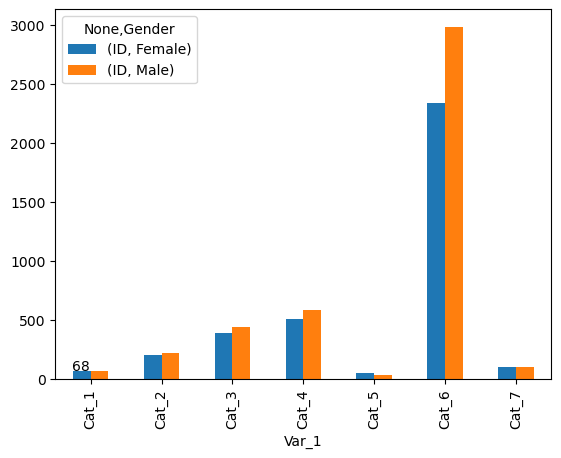

In [20]:
make_pivot('Var_1','Gender')

The syntax above defines a function called make_pivot that is used to create a pivot table and a bar chart showing the relationship between two given variables. In this example, the function is used to explore the relationship between the variables 'Var_1' and 'Gender'.

* Apart from that, we can also just create a pivot table without a chart.

In [21]:
df_slice=df[['Ever_Married', 'Spending_Score', 'ID']]
slice_pivot1=df_slice.pivot_table(index=['Ever_Married'], columns=['Spending_Score'], \
                                        aggfunc=np.size, fill_value=0)

In [22]:
slice_pivot1

ID            
Spending_Score Average  High   Low
Ever_Married                      
No                   0     0  3285
Yes               1937  1176  1530
unknown             37    40    63

It can be seen that there is information, the Spending Score of unmarried people is mostly Low, while married people are evenly divided into Average, High and Low.

* We can also grouping in Pivot, by adding one or more column to the index

In [23]:
df_slice=df[['Ever_Married', 'Gender', 'Spending_Score', 'ID']]
slice_pivot2=df_slice.pivot_table(index=['Ever_Married', 'Gender'], columns=['Spending_Score'], \
                                        aggfunc=np.size, fill_value=0)

In [24]:
slice_pivot2

ID           
Spending_Score      Average High   Low
Ever_Married Gender                   
No           Female       0    0  1707
             Male         0    0  1578
Yes          Female     812  471   585
             Male      1125  705   945
unknown      Female      19   19    38
             Male        18   21    25

From the pivot table information above, there is more specific information after grouping. You can see the Spending Score based on those who are married and their gender.

### 2. Crosstab

This is almost similar to a Pivot table, but...

The crosstab() function especially when using Pandas, is used to create a crosstabulation of two or more variables. A cross table is a table that shows the frequency of appearance of a combination of values for these variables. 

In [25]:
pd.crosstab(df.Age, df.Gender)

Gender,Female,Male
Age,,
18,46,86
19,43,91
20,53,74
21,47,69
22,53,89
...,...,...
85,9,13
86,17,13
87,14,14


### 3. Group By

Using the group by function, you can group rows of data based on specific values in one or more columns, and then apply aggregation operations such as sum, count, mean, etc. in each group.

In [26]:
df[['Age', 'Gender']].groupby('Gender').mean()

,Age
Gender,
Female,42.911531
Male,43.925968


### 4. Concat

The concat() function in data manipulation is generally used to combine dataframes either row-wise or column-wise.

In [27]:
df1 = df[['ID','Gender', 'Age']][0:5]
df2 = df[['ID', 'Profession','Age']][0:5]

In [28]:
df1

,ID,Gender,Age
0,462809,Male,22
1,462643,Female,38
2,466315,Female,67
3,461735,Male,67
4,462669,Female,40


In [29]:
df2

,ID,Profession,Age
0,462809,Healthcare,22
1,462643,Engineer,38
2,466315,Engineer,67
3,461735,Lawyer,67
4,462669,Entertainment,40


In [30]:
df_concat = pd.concat([df1, df2], axis=1)
df_concat

,ID,Gender,Age,ID,Profession,Age
0,462809,Male,22,462809,Healthcare,22
1,462643,Female,38,462643,Engineer,38
2,466315,Female,67,466315,Engineer,67
3,461735,Male,67,461735,Lawyer,67
4,462669,Female,40,462669,Entertainment,40


### 5. Merge

The .merge() method is used to merge DataFrame or Series. It's equivalent to SQL join methods (left join, right join, inner join, and outer join), but we need to specify the tables on the left and right sides, as well as the key columns for merging.

In [31]:
#From the "Customer Segmentation Classification" dataset, it has a key column or primary key, namely ID.
#Why must have a primary key or key column? 
#The key column is used as a reference to identify the corresponding rows between two DataFrames to be combined.

df3 = df[['ID', 'Gender', 'Age']][0:7]

df4 = df[['ID', 'Ever_Married', 'Spending_Score']][0:7]

df_merge = pd.merge(df3, df4, how = 'left', on = ['ID'])
df_merge

,ID,Gender,Age,Ever_Married,Spending_Score
0,462809,Male,22,No,Low
1,462643,Female,38,Yes,Average
2,466315,Female,67,Yes,Low
3,461735,Male,67,Yes,High
4,462669,Female,40,Yes,High
5,461319,Male,56,Yes,Average
6,460156,Male,32,No,Low
